In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo

from IPython.display import display
from plotly.graph_objs.scatter.marker import Line

%matplotlib inline


# California Housing Price Prediction

In [2]:
houseData = pd.read_csv("housing.csv")

In [3]:
houseData

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income ocean_proximity  \
0             322         126         8.3252        NEAR BAY   
1            2401        1138         8.3014        NEAR BAY   
2             496         177         7.2574        NEAR BAY   
3             558         219         5.6431        NEAR BAY   
4             565         259         3.8462        NEAR BAY   
...           ...         ...            ...             ...   
20635         845         330         1.5603          INLAND   
20636         356         114         2.5568          INLAND   
20637        1007         433         1.7000          INLAND   
20638         741         349         1.8672          INLAND   
20639        1387         530         2.3886          INLAND   

       median_house_value  
0                  452600  
1                  358500  
2                  352100  
3                  341300  
4                  342200  
...                   ...  
20635               78100  
20636               77100  
20637               92300  
20638               84700  
20639               89400  

[20640 rows x 10 columns]

* longitude (signed numeric - float) : Longitude value for the block in California, USA
* latitude (numeric - float ) : Latitude value for the block in California, USA
* housing_median_age (numeric - int ) : Median age of the house in the block
* total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in
all houses in the block
* total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in
the block
* population (numeric - int ) : Count of the total number of population in the block
* households (numeric - int ) : Count of the total number of households in the block
* median_income (numeric - float ) : Median of the total household income of all the houses
in the block
* ocean_proximity (numeric - categorical ) : Type of the landscape of the block
[ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]
* median_house_value (numeric - int ) : Median of the household prices of all the houses in
the block


In [4]:
houseData.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [5]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
houseData.shape

(20640, 10)

In [7]:
houseData.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   
5    -122.25     37.85                  52          919           213.0   
6    -122.25     37.84                  52         2535           489.0   
7    -122.25     37.84                  52         3104           687.0   
8    -122.26     37.84                  42         2555           665.0   
9    -122.25     37.84                  52         3549           707.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  
5         413         193         4.0368        NEAR BAY              269700  
6        1094         514         3.6591        NEAR BAY              299200  
7        1157         647         3.1200        NEAR BAY              241400  
8        1206         595         2.0804        NEAR BAY              226700  
9        1551         714         3.6912        NEAR BAY              261100

In [8]:
X = houseData.iloc[:, :-1].values
y = houseData.iloc[:, [-1]].values

In [9]:
X.shape

(20640, 9)

In [10]:
type(X)

numpy.ndarray

In [11]:
X[0]

array([-122.23, 37.88, 41, 880, 129.0, 322, 126, 8.3252, 'NEAR BAY'],
      dtype=object)

In [12]:
# Step3: Handle missing values: 
# Fill the missing values with the mean of the respective column

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X[:, :-1] = imputer.fit_transform(X[:, :-1])
y =  imputer.fit_transform(y)

In [13]:
# Encode categorical data: 
# Convert categorical column in the dataset to numerical data

from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X[:, -1] = X_labelencoder.fit_transform(X[:, -1])

# Visualization of the data

In [14]:
fig = px.scatter(
    houseData, x='median_income', y='median_house_value', opacity=0.76,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

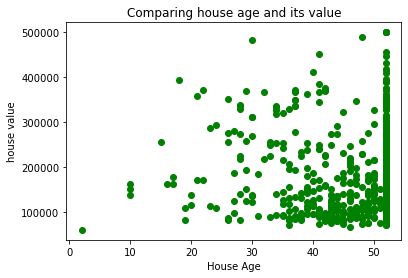

In [15]:
plt.scatter(houseData.head(500)['housing_median_age'], houseData.head(500)['median_house_value'], color="g")
plt.title('Comparing house age and its value')
plt.xlabel('House Age')
plt.ylabel('house value')
plt.show()

# Creating a model

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
X_train.shape

(16512, 9)

In [20]:
X_test.shape

(4128, 9)

In [21]:
y_train.shape

(16512, 1)

In [22]:
y_test.shape

(4128, 1)

In [23]:
y_pred_test=model.predict(X_test)

In [24]:
y_pred_test[0]

array([0.03048331])

In [25]:
y_test[0]

array([-0.60810016])

# Evaluating the model performance

Text(0, 0.5, 'Predicted values for y')

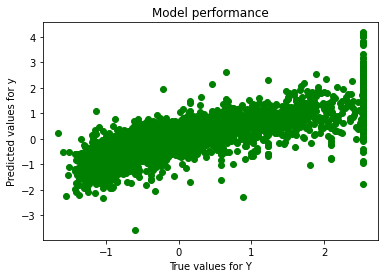

In [26]:
plt.scatter(y_test,y_pred_test,color='green')
plt.title('Model performance')
plt.xlabel('True values for Y')
plt.ylabel('Predicted values for y')

In [27]:
from sklearn.metrics import mean_squared_error,r2_score

print('Root Mean Squared Error = %.4f'%(np.sqrt(mean_squared_error(y_test,y_pred_test))))
print('R-Squared = %.4f'%(r2_score(y_test,y_pred_test)))

Root Mean Squared Error = 0.6036
R-Squared = 0.6261


In [28]:
#Postprocessing
#display the coefficients

print('Slope = ',model.coef_[0][0])

Slope =  -0.7358310667577718


In [29]:
print('Intercept = ',model.intercept_[0])

Intercept =  -9.675685131184276e-14


In [30]:
X.shape

(20640, 9)

In [31]:
seed = 1
numInstances = 20640

In [32]:
numTrain = 16512
numTest = numInstances - numTrain

In [33]:
np.random.seed(seed)

In [34]:
X2=0.5 * X + np.random.normal(0,0.04,size=numInstances).reshape(-1,1)

In [35]:
X2.shape

(20640, 9)

In [36]:
X3 =0.5 * X2 + np.random.normal(0,0.01,size=numInstances).reshape(-1,1)

In [37]:
X4 = 0.5 * X3 + np.random.normal(0,0.01,size=numInstances).reshape(-1,1)

In [38]:
X5 = 0.5 * X4 + np.random.normal(0,0.01,size=numInstances).reshape(-1,1)

In [39]:
X6 = 0.5 * X5 + np.random.normal(0,0.01,size=numInstances).reshape(-1,1)

In [40]:
X7 = 0.5 * X6 + np.random.normal(0,0.01,size=numInstances).reshape(-1,1)

In [41]:
X8 = 0.5 * X7 + np.random.normal(0,0.01,size=numInstances).reshape(-1,1)

In [42]:
X9 = 0.5 * X8 + np.random.normal(0,0.01,size=numInstances).reshape(-1,1)

In [43]:
X8.shape

(20640, 9)

Text(0.5, 1.0, 'Correlation between X8 and X9 = -0.2562')

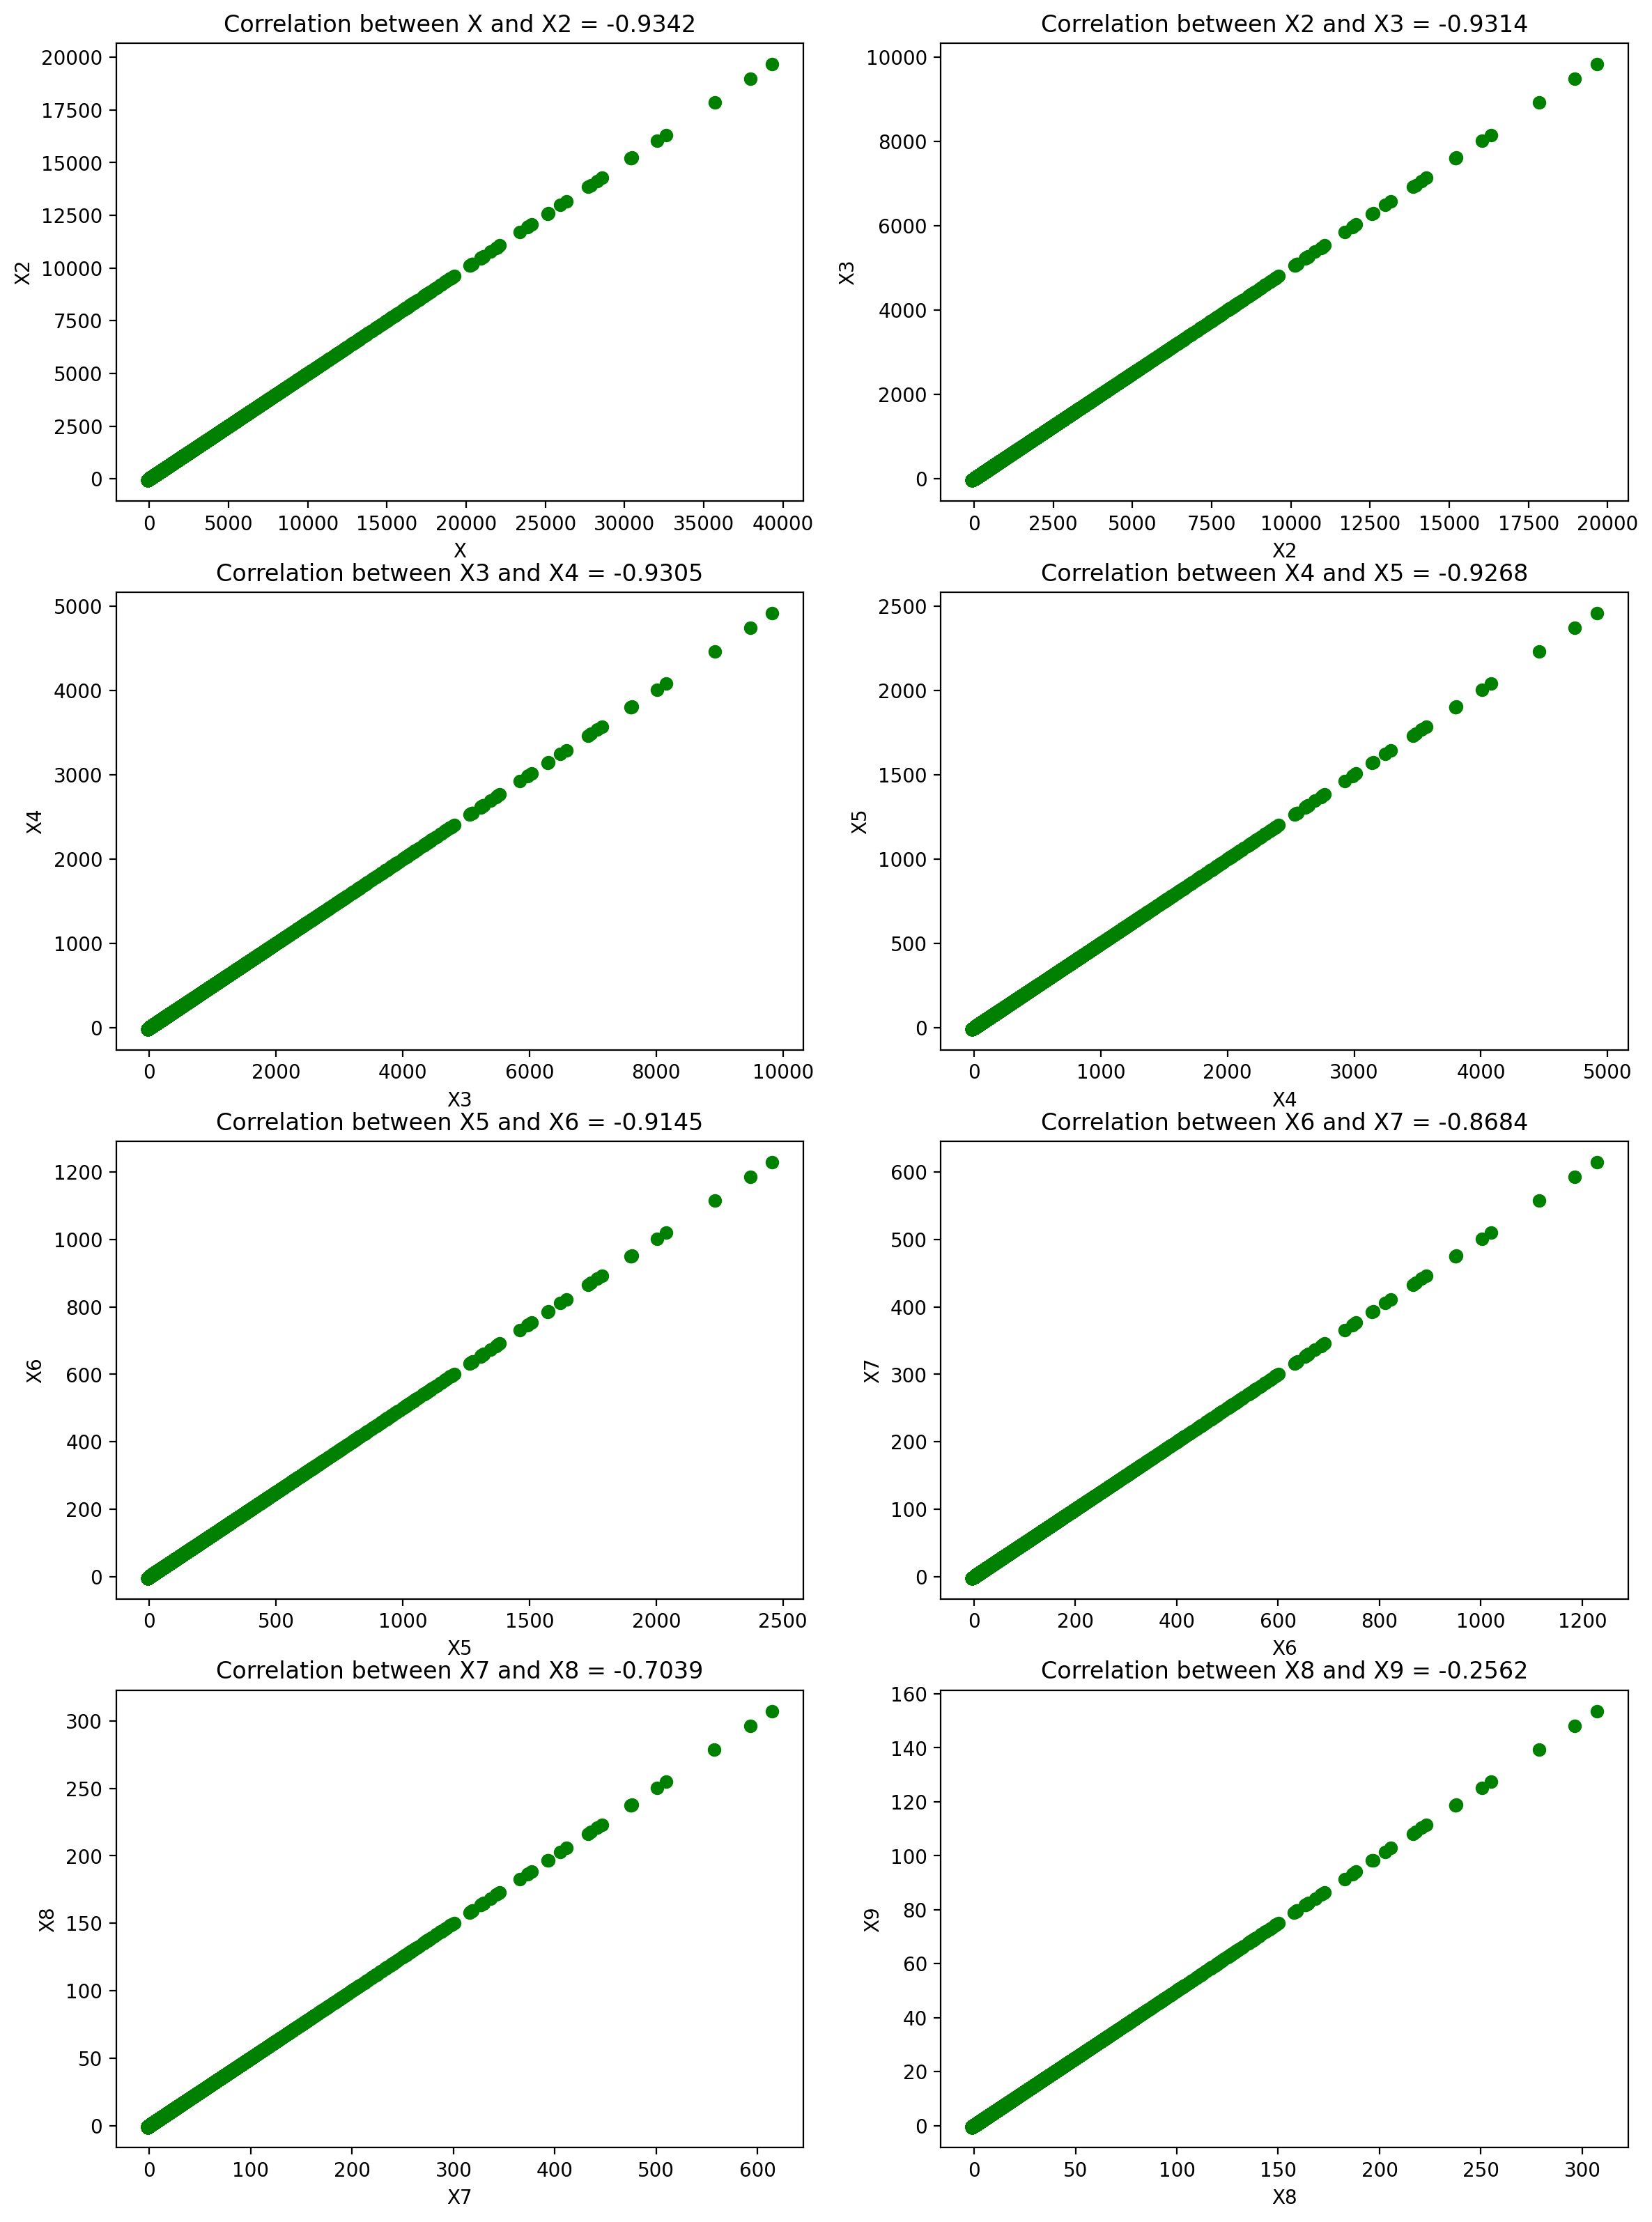

In [44]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8))=plt.subplots(4,2,figsize=(14,20), dpi = 200)
ax1.scatter(X,X2,color='green')
ax1.set_xlabel('X')
ax1.set_ylabel('X2')
c=np.corrcoef(np.column_stack((X[:-numTest],X2[:-numTest])).astype(float).T)
titlestr='Correlation between X and X2 = %.4f'%(c[0,1])
ax1.set_title(titlestr)

ax2.scatter(X2,X3,color='green')
ax2.set_xlabel('X2')
ax2.set_ylabel('X3')
c=np.corrcoef(np.column_stack((X2[:-numTest],X3[:-numTest])).astype(float).T)
titlestr='Correlation between X2 and X3 = %.4f'%(c[0,1])
ax2.set_title(titlestr)

ax3.scatter(X3,X4,color='green')
ax3.set_xlabel('X3')
ax3.set_ylabel('X4')
c=np.corrcoef(np.column_stack((X3[:-numTest],X4[:-numTest])).astype(float).T)
titlestr='Correlation between X3 and X4 = %.4f'%(c[0,1])
ax3.set_title(titlestr)

ax4.scatter(X4,X5,color='green')
ax4.set_xlabel('X4')
ax4.set_ylabel('X5')
c=np.corrcoef(np.column_stack((X4[:-numTest],X5[:-numTest])).astype(float).T)
titlestr='Correlation between X4 and X5 = %.4f'%(c[0,1])
ax4.set_title(titlestr)

ax5.scatter(X5,X6,color='green')
ax5.set_xlabel('X5')
ax5.set_ylabel('X6')
c=np.corrcoef(np.column_stack((X5[:-numTest],X6[:-numTest])).astype(float).T)
titlestr='Correlation between X5 and X6 = %.4f'%(c[0,1])
ax5.set_title(titlestr)

ax6.scatter(X6,X7,color='green')
ax6.set_xlabel('X6')
ax6.set_ylabel('X7')
c=np.corrcoef(np.column_stack((X6[:-numTest],X7[:-numTest])).astype(float).T)
titlestr='Correlation between X6 and X7 = %.4f'%(c[0,1])
ax6.set_title(titlestr)

ax7.scatter(X7,X8,color='green')
ax7.set_xlabel('X7')
ax7.set_ylabel('X8')
c=np.corrcoef(np.column_stack((X7[:-numTest],X8[:-numTest])).astype(float).T)
titlestr='Correlation between X7 and X8 = %.4f'%(c[0,1])
ax7.set_title(titlestr)


ax8.scatter(X8,X9,color='green')
ax8.set_xlabel('X8')
ax8.set_ylabel('X9')
c=np.corrcoef(np.column_stack((X8[:-numTest],X9[:-numTest])).astype(float).T)
titlestr='Correlation between X8 and X9 = %.4f'%(c[0,1])
ax8.set_title(titlestr)

In [45]:
X_train2=np.column_stack((X[:-numTest],X2[:-numTest]))
X_test2=np.column_stack((X[-numTest:],X2[-numTest:]))

In [46]:
X_train3=np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest]))
X_test3=np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:]))

In [47]:
X_train4=np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest]))
X_test4=np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:]))

In [48]:
X_train5=np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest],X5[:-numTest]))
X_test5=np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:],X5[-numTest:]))

In [49]:
X_train6=np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest],X5[:-numTest],X6[:-numTest]))
X_test6=np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:],X5[-numTest:],X6[-numTest:]))

In [50]:
X_train7=np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest],X5[:-numTest],X6[:-numTest],X7[:-numTest]))
X_test7=np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:],X5[-numTest:],X6[-numTest:], X7[-numTest:]))

In [51]:
X_train8=np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest],X5[:-numTest],X6[:-numTest],X7[:-numTest],X8[:-numTest]))
X_test8=np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:],X5[-numTest:],X6[-numTest:], X7[-numTest:], X8[-numTest:]))

In [52]:
X_train9=np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest],X5[:-numTest],X6[:-numTest],X7[:-numTest],X8[:-numTest],X9[:-numTest]))
X_test9=np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:],X5[-numTest:],X6[-numTest:], X7[-numTest:], X8[-numTest:],X9[-numTest:]))

In [53]:
X_train9.shape

(16512, 81)

In [54]:
X_test9.shape

(4128, 81)

In [55]:
X_train9[0]

array([-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252, 3,
       -61.050026185453476, 19.00497381454653, 20.56497381454653,
       440.06497381454653, 64.56497381454653, 161.06497381454653,
       63.064973814546526, 4.22757381454653, 1.5649738145465297,
       -30.52182080437767, 9.505679195622337, 10.285679195622336,
       220.03567919562235, 32.285679195622336, 80.53567919562234,
       31.535679195622333, 2.1169791956223354, 0.7856791956223353,
       -15.274169956252948, 4.739580043747054, 5.129580043747054,
       110.00458004374705, 16.129580043747055, 40.254580043747055,
       15.754580043747053, 1.0452300437470539, 0.3795800437470538,
       -7.653930333789659, 2.3529446662103424, 2.547944666210342,
       54.98544466621034, 8.047944666210343, 20.11044466621034,
       7.860444666210341, 0.5057696662103421, 0.17294466621034207,
       -3.8228654559536364, 1.1805720440463645, 1.2780720440463644,
       27.496822044046365, 4.028072044046365, 10.059322044046365,
     

# Test the 8 new regression model based on the 8 version of the training and test data

In [56]:
model2 = LinearRegression()
model2.fit(X_train2,y_train)

LinearRegression()

In [57]:
model3 = LinearRegression()
model3.fit(X_train3,y_train)

LinearRegression()

In [58]:
model4 = LinearRegression()
model4.fit(X_train4,y_train)

LinearRegression()

In [59]:
model5 = LinearRegression()
model5.fit(X_train5,y_train)

LinearRegression()

In [60]:
model6 = LinearRegression()
model6.fit(X_train6,y_train)

LinearRegression()

In [61]:
model7 = LinearRegression()
model7.fit(X_train7,y_train)

LinearRegression()

In [62]:
model8 = LinearRegression()
model8.fit(X_train8,y_train)

LinearRegression()

In [63]:
model9 = LinearRegression()
model9.fit(X_train9,y_train)

LinearRegression()

In [64]:
y_pred_train= model.predict(X_train)
y_pred_test=model.predict(X_test)

In [65]:
y_pred_train2= model2.predict(X_train2)
y_pred_test2=model2.predict(X_test2)

In [66]:
y_pred_train3= model3.predict(X_train3)
y_pred_test3=model3.predict(X_test3)

In [67]:
y_pred_train4= model4.predict(X_train4)
y_pred_test4=model4.predict(X_test4)

In [68]:
y_pred_train5= model5.predict(X_train5)
y_pred_test5=model5.predict(X_test5)

In [69]:
y_pred_train6= model6.predict(X_train6)
y_pred_test6=model6.predict(X_test6)

In [70]:
y_pred_train7= model7.predict(X_train7)
y_pred_test7=model7.predict(X_test7)

In [71]:
y_pred_train8= model8.predict(X_train8)
y_pred_test8=model8.predict(X_test8)

In [72]:
y_pred_train9= model9.predict(X_train9)
y_pred_test9=model9.predict(X_test9)

In [73]:
columns=['Model','Train Error','Test Error','Sum of Absolute Weights']

In [74]:
model1 = "%.2f X + %.2f" % (model.coef_[0][0], model.intercept_[0])
values1 = [ model1, np.sqrt(mean_squared_error(y_train, y_pred_train)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test)),
           np.absolute(model.coef_[0]).sum() + np.absolute(model.intercept_[0])]

In [75]:
model_2 = "%.2f X + %.2f X2 + %.2f" % (model2.coef_[0][0], model2.coef_[0][1], model2.intercept_[0])
values2 = [ model_2, np.sqrt(mean_squared_error(y_train, y_pred_train2)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test2)),
           np.absolute(model2.coef_[0]).sum() + np.absolute(model2.intercept_[0])]

In [76]:
model_3 = "%.2f X + %.2f X2 + %.2f X3 + %.2f" % (model3.coef_[0][0], model3.coef_[0][1], 
                                                model3.coef_[0][2], model3.intercept_[0])
values3 = [ model_3, np.sqrt(mean_squared_error(y_train, y_pred_train3)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test3)),
           np.absolute(model3.coef_[0]).sum() + np.absolute(model3.intercept_[0])]

In [77]:
model_4 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f" % (model4.coef_[0][0], model4.coef_[0][1], 
                                        model4.coef_[0][2], model4.coef_[0][3], model4.intercept_[0])
values4 = [ model_4, np.sqrt(mean_squared_error(y_train, y_pred_train4)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test4)),
           np.absolute(model4.coef_[0]).sum() + np.absolute(model4.intercept_[0])]

In [78]:
model_5 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (model5.coef_[0][0], 
                                        model5.coef_[0][1], model5.coef_[0][2], 
                                        model5.coef_[0][3], model5.coef_[0][4], model5.intercept_[0])
values5 = [ model_5, np.sqrt(mean_squared_error(y_train, y_pred_train5)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test5)),
           np.absolute(model5.coef_[0]).sum() + np.absolute(model5.intercept_[0])]

In [79]:
model_6 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f X6 + %.2f" % (model6.coef_[0][0], 
                                        model6.coef_[0][1], model6.coef_[0][2], 
                                        model6.coef_[0][3], model6.coef_[0][4], model6.coef_[0][5], model6.intercept_[0])
values6 = [ model_6, np.sqrt(mean_squared_error(y_train, y_pred_train6)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test6)),
           np.absolute(model6.coef_[0]).sum() + np.absolute(model6.intercept_[0])]

In [80]:
model_7 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f X6 + %.2f X7 + %.2f" % (model7.coef_[0][0], 
                                        model7.coef_[0][1], model7.coef_[0][2], 
                                        model7.coef_[0][3], model7.coef_[0][4],
                                        model7.coef_[0][5], model7.coef_[0][6], model7.intercept_[0])
values7 = [ model_7, np.sqrt(mean_squared_error(y_train, y_pred_train7)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test7)),
           np.absolute(model7.coef_[0]).sum() + np.absolute(model7.intercept_[0])]

In [81]:
model_8 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f X6 + %.2f X7 + %.2f X8 + %.2f" % (model8.coef_[0][0], 
                                        model8.coef_[0][1], model8.coef_[0][2], 
                                        model8.coef_[0][3], model8.coef_[0][4],
                                        model8.coef_[0][5], model8.coef_[0][6], model8.coef_[0][7], model8.intercept_[0])
values8 = [ model_8, np.sqrt(mean_squared_error(y_train, y_pred_train8)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test8)),
           np.absolute(model8.coef_[0]).sum() + np.absolute(model8.intercept_[0])]

In [82]:
model_9 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f X6 + %.2f X7 + %.2f X8 + %.2f X9 + %.2f" % (model8.coef_[0][0], 
                                        model9.coef_[0][1], model9.coef_[0][2], 
                                        model9.coef_[0][3], model9.coef_[0][4],
                                        model9.coef_[0][5], model9.coef_[0][6], 
                                        model9.coef_[0][7], model9.coef_[0][8], model9.intercept_[0])
values9 = [ model_9, np.sqrt(mean_squared_error(y_train, y_pred_train9)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test9)),
           np.absolute(model9.coef_[0]).sum() + np.absolute(model9.intercept_[0])]

In [83]:
results=pd.DataFrame([values1,values2,values3,values4,values5,values6,values7,values8,values9],columns=columns)

In [84]:
results

Model  Train Error  Test Error  \
0                                    -0.74 X + -0.00     0.601750    0.603579   
1                          -0.00 X + -0.00 X2 + 0.16     0.999858    0.987093   
2               -0.00 X + -0.00 X2 + -0.00 X3 + 0.17     0.999832    0.987282   
3  132750114.58 X + 100354498.00 X2 + 99330012.13...     0.999814    0.987405   
4  126263352.86 X + 91930778.39 X2 + 90841257.63 ...     0.999781    0.987222   
5  126317355.74 X + 91072692.75 X2 + 89979584.19 ...     0.999763    0.987365   
6  126108598.20 X + 90889407.62 X2 + 89782210.25 ...     0.999763    0.987391   
7  125662523.80 X + 90555941.70 X2 + 89450085.54 ...     0.999751    0.987471   
8  125662523.80 X + 89687555.72 X2 + 88593863.38 ...     0.999753    0.987443   

   Sum of Absolute Weights  
0             3.348947e+00  
1             1.954539e-01  
2             1.287974e+00  
3             1.669149e+10  
4             1.682748e+10  
5             1.726918e+10  
6             1.732191e+10  
7             1.730092e+10  
8             1.716425e+10

In [85]:
#pd.options.display.float_format = '{:.4f}'.format

In [86]:
results["Sum of Absolute Weights"].values

array([3.34894685e+00, 1.95453863e-01, 1.28797358e+00, 1.66914851e+10,
       1.68274769e+10, 1.72691847e+10, 1.73219078e+10, 1.73009199e+10,
       1.71642463e+10])

Model  Train Error  Test Error  \
0                                    -0.74 X + -0.00     0.601750    0.603579   
1                          -0.00 X + -0.00 X2 + 0.16     0.999858    0.987093   
2               -0.00 X + -0.00 X2 + -0.00 X3 + 0.17     0.999832    0.987282   
3  132750114.58 X + 100354498.00 X2 + 99330012.13...     0.999814    0.987405   
4  126263352.86 X + 91930778.39 X2 + 90841257.63 ...     0.999781    0.987222   
5  126317355.74 X + 91072692.75 X2 + 89979584.19 ...     0.999763    0.987365   
6  126108598.20 X + 90889407.62 X2 + 89782210.25 ...     0.999763    0.987391   
7  125662523.80 X + 90555941.70 X2 + 89450085.54 ...     0.999751    0.987471   
8  125662523.80 X + 89687555.72 X2 + 88593863.38 ...     0.999753    0.987443   

   Sum of Absolute Weights  
0             3.348947e+00  
1             1.954539e-01  
2             1.287974e+00  
3             1.669149e+10  
4             1.682748e+10  
5             1.726918e+10  
6             1.732191e+10  
7             1.730092e+10  
8             1.716425e+10

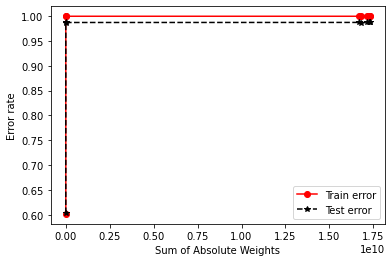

In [87]:
plt.plot(results['Sum of Absolute Weights'], results['Train Error'], 'ro-')
plt.plot(results['Sum of Absolute Weights'], results['Test Error'], 'k*--')
plt.legend(['Train error', 'Test error'])
plt.xlabel('Sum of Absolute Weights')
plt.ylabel('Error rate')

results

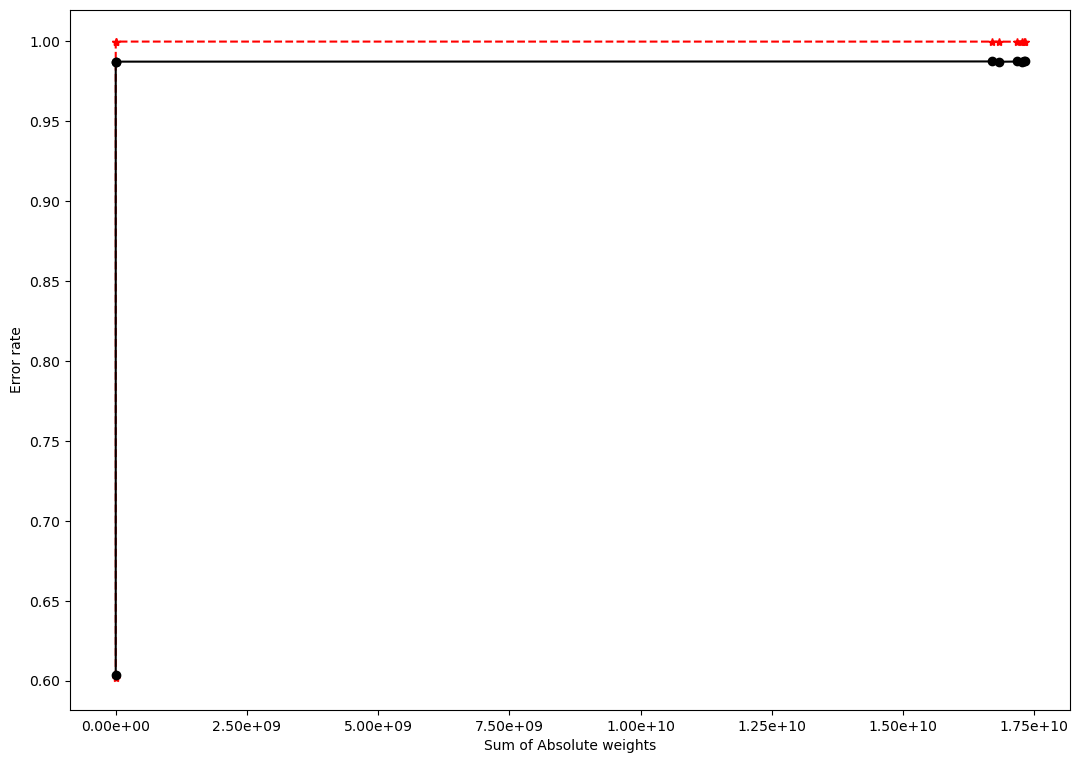

In [88]:
fig = plt.figure(figsize=(10,7),dpi=100)
axes = fig.add_axes([0,0,1,1])
axes.plot(results['Sum of Absolute Weights'], results['Train Error'], ls = "--", color = "r", marker = "*")
axes.plot(results['Sum of Absolute Weights'], results['Test Error'], ls = "-", color = "k", marker = "o")
axes.set_title('')
axes.set_xlabel('Sum of Absolute weights')
axes.set_ylabel('Error rate')
axes.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.show()

In [89]:
fig = go.Figure()
fig.add_trace(go.Line(x = results['Sum of Absolute Weights'], y = results['Train Error'], name = "Train error"))
fig.add_trace(go.Line(x = results['Sum of Absolute Weights'], y = results['Test Error'], name = "Test error"))
fig.update_layout(title='',xaxis=dict(title='Sum of Absolute Weights'), yaxis=dict(title='Error Rate'), showlegend = True)


C:\Users\Bill\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


